In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 10)
import datetime as dt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv("../loan.csv")

/Users/veniladri/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# Shape of data
print ('Total number of loan applicants - ', df.shape[0])

Total number of loan applicants -  39717


## Data Cleaning

As a part of pre-processing step, let's perform some data cleaning activity, remove outliers if any and fill the data from reliable sources.
- Remove rows containing missing values
- Remove outliers
- Extract useful information and drop columns if not required

### Dropping duplicate rows

In [5]:
print ('Rows before dropping - ', df.shape[0])
df.drop_duplicates(inplace=True)
print ('Rows after dropping - ', df.shape[0])

Rows before dropping -  39717
Rows after dropping -  39717


## Cleaning dataset containing missing or irrelevant values

In [6]:
# Clean dataset if all the values of a variable contains NaN

df.dropna(axis=1, inplace=True, how='all')

In [7]:
print ('Shape of data frame - ', df.shape)

Shape of data frame -  (39717, 57)


**1. loan_status**

Different unique types of loan status recorded by LC

In [8]:
print ('Loan status: ', df['loan_status'].unique())

Loan status:  ['Fully Paid' 'Charged Off' 'Current']


**2. grade, sub_grade**

In [9]:
print ('Loan grades: ', df['grade'].unique())
print ('Loan subgrades: ', df['sub_grade'].unique())

Loan grades:  ['B' 'C' 'A' 'E' 'F' 'D' 'G']
Loan subgrades:  ['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']


**3. term**

Lending club offers loans only for a tenure of either 3 years or 5 years. Let's check the tenure from given data

In [10]:
print ('Loan tenure: ', df['term'].unique())

Loan tenure:  [' 36 months' ' 60 months']


In [11]:
# Convert term values to integer (36 and 60)
df['term'] = df['term'].str.rstrip(' months')
df['term'] = df['term'].astype('int64')

**4. issue_d**

The data provided contains the loan data issued for the years 2007-2011

In [12]:
df['issue_year'] = df['issue_d'].apply(lambda x: dt.datetime.strptime(x, '%b-%y').year)
print ('Loan issue years: ', df['issue_year'].unique())

Loan issue years:  [2011 2010 2009 2008 2007]


In [13]:
yearly_loan_status = pd.pivot_table(data=df, columns=df["loan_status"], index=df["issue_year"], values="issue_year", fill_value=0, aggfunc=len)
absolute_yearly_loan_status = yearly_loan_status[['Charged Off', 'Current', 'Fully Paid']].apply(lambda x: 100*x/x.sum(), axis=1)
absolute_yearly_loan_status

loan_status  Charged Off  Current  Fully Paid
issue_year                                   
2007           17.928287  0.00000   82.071713
2008           15.813060  0.00000   84.186940
2009           12.595420  0.00000   87.404580
2010           12.877211  0.00000   87.122789
2011           15.035094  5.26413   79.700776

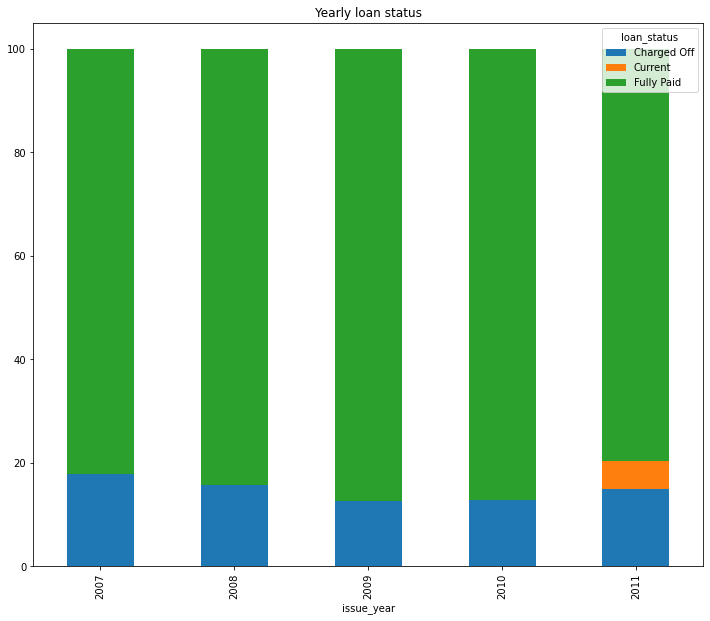

In [14]:
absolute_yearly_loan_status.plot(kind="bar", stacked=True, title="Yearly loan status")
plt.show()

**There isn't much difference do we see in the different types of loan applications across the loan issue year.** 
From the plot above, we can observe that the proportion of charged off loan applicants in the years 2007-2011 is almost the same. We can continue to drop this column.

In [15]:
df.drop('issue_d', axis=1, inplace=True)
df.drop('issue_year', axis=1, inplace=True)

**5. emp_title**

In [16]:
df [df['emp_title'].isnull() == True].shape[0]

2459

Let's see if this column has any importance to our data analysis

In [17]:
df['emp_title'].nunique()

28820

Since there are too many employee titles present in the data, we cannot categorise it into another variable to analyse the loan applicant. We can remove this column.

In [18]:
df.drop('emp_title', axis=1, inplace=True)

**6. title , purpose, desc** 

In [19]:
df['title'].unique()

array(['Computer', 'bike', 'real estate business', ...,
       'Retiring credit card debt', 'MBA Loan Consolidation', 'JAL Loan'],
      dtype=object)

In [20]:
df['purpose'].value_counts(normalize=True)

debt_consolidation    0.469346
credit_card           0.129164
other                 0.100536
home_improvement      0.074930
major_purchase        0.055065
small_business        0.046026
car                   0.039001
wedding               0.023844
medical               0.017448
moving                0.014679
house                 0.009593
vacation              0.009593
educational           0.008183
renewable_energy      0.002593
Name: purpose, dtype: float64

Looks like purpose column is a parent category for title. Dropping title column as that won't be of much use if we have the purpose column

In [21]:
df.drop('title', axis=1, inplace=True)

In [22]:
df.shape

(39717, 54)

In [23]:
# Dropping desc column as well as it is basically the data entered by the cutomer 
df.drop('desc', axis=1, inplace=True)

**8. application_type**

In [24]:
df['application_type'].value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

Dropping this column as there is no other cateorical value to compare and this has no importance to our analysis

In [25]:
df.drop('application_type', axis=1, inplace=True)

**9. chargeoff_within_12_mths**

In [26]:
df['chargeoff_within_12_mths'].value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [27]:
df.drop('chargeoff_within_12_mths', axis=1, inplace=True)

**10. emp_length**

In [28]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

Let's check the number of charged off loan applications in each of the above employee tenures

In [29]:
df_emp_length_data = pd.pivot_table(data=df, index=df['emp_length'], columns=df['loan_status'], values='emp_length', aggfunc='count')
df_emp_length_data

loan_status  Charged Off  Current  Fully Paid
emp_length                                   
1 year               456       71        2713
10+ years           1331      391        7157
2 years              567       97        3724
3 years              555       83        3457
4 years              462       94        2880
5 years              458       88        2736
6 years              307       61        1861
7 years              263       62        1448
8 years              203       44        1232
9 years              158       32        1068
< 1 year             639       75        3869

In order to infer something from the above data, we need to calculate the absolute values of count or percentage of data under each loan status. 

In [30]:
df_emp_length_data_abs = df_emp_length_data[['Charged Off', 'Current', 'Fully Paid']].apply(lambda x: 100*x/x.sum(), axis=1)
df_emp_length_data_abs

loan_status  Charged Off   Current  Fully Paid
emp_length                                    
1 year         14.074074  2.191358   83.734568
10+ years      14.990427  4.403649   80.605924
2 years        12.921604  2.210574   84.867821
3 years        13.553114  2.026862   84.420024
4 years        13.445867  2.735739   83.818393
5 years        13.954906  2.681292   83.363803
6 years        13.772992  2.736653   83.490354
7 years        14.833615  3.496898   81.669487
8 years        13.725490  2.974983   83.299527
9 years        12.559618  2.543720   84.896661
< 1 year       13.942832  1.636483   84.420685

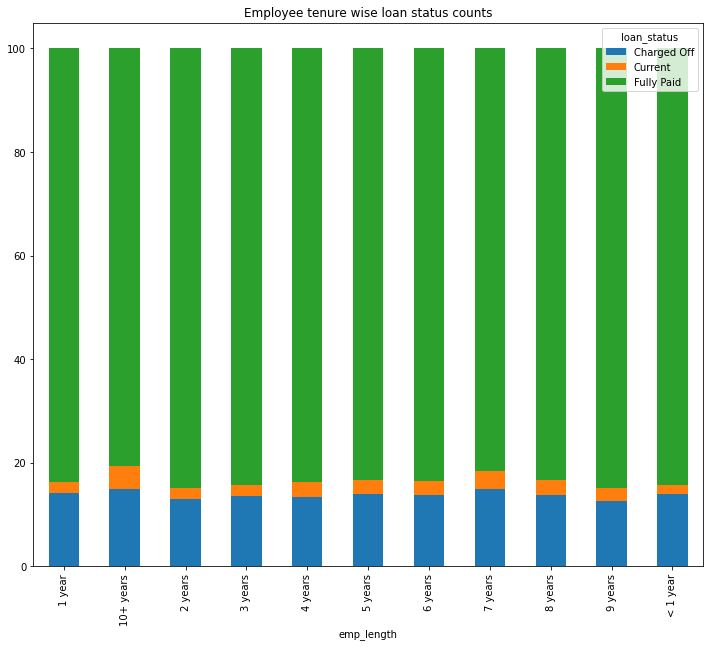

In [31]:
df_emp_length_data_abs.plot(kind="bar", stacked=True, title="Employee tenure wise loan status counts")
plt.show()

We can drop this column since the proportion of charged off loan applicant count across different employee tenure is same.

In [32]:
df.drop('emp_length', axis=1, inplace=True)

**12. pub_rec_bankruptcies**

In [33]:
df['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [34]:
missing_values_pub_rec_bankruptcies = df['pub_rec_bankruptcies'].isna().sum()
print (missing_values_pub_rec_bankruptcies)

697


In [35]:
perc_miss_val_pub_rec_bankruptcies = missing_values_pub_rec_bankruptcies/df.shape[0] * 100
print (perc_miss_val_pub_rec_bankruptcies)

1.7549160309187504


Since the missing rows account for only **1.76%** of the total data, we can remove these rows

In [36]:
df = df[-df['pub_rec_bankruptcies'].isna()]
print ('Total number of loan applications = ', df.shape[0])

Total number of loan applications =  39020


**13. tax_liens**

In [37]:
df['tax_liens'].value_counts()

0.0    39020
Name: tax_liens, dtype: int64

In [38]:
df.drop('tax_liens', axis=1, inplace=True)

**14. zip_code**

In [39]:
df['zip_code'].value_counts()

100xx    571
945xx    540
112xx    506
606xx    498
070xx    461
        ... 
369xx      1
479xx      1
471xx      1
753xx      1
266xx      1
Name: zip_code, Length: 810, dtype: int64

Dropping this column as well since the value is masked and is of no importance to our data analysis

In [40]:
df.drop('zip_code', axis=1, inplace=True)

**15. url**

Dropping this attribute as well

In [41]:
df.drop('url', axis=1, inplace=True)

**16. revol_util**

In [42]:
df['revol_util'].isna().sum()

50

In [43]:
df['revol_util'].isna().sum()/df.shape[0] * 100

0.12813941568426446

Since revol_util or *revolving line of credit utilisation* is an important factor creditors use to decide whether to lend money or not, having NA in these values won't be of much help to our analysis. We shall remove those rows. Such rows accounts for only **0.12%** of the total data.

In [44]:
df = df[df['revol_util'].isna() == False]

**Sanitising revol_util**

In [45]:
df['revol_util'] = df['revol_util'].apply(lambda x: float(x[:-1])/100 if(x[-1]=='%') else float(x))

**17. initial_list_status**

In [46]:
df['initial_list_status'].value_counts()

f    38970
Name: initial_list_status, dtype: int64

Dropping this column as we have only 1 value throughout the data

In [47]:
df.drop('initial_list_status', axis=1, inplace=True)

**20. next_pymnt_d**

This columns won't be of use to us since our objective is to analyse the borrowers who defaulted on their loans already whatever be the next scheduled payment date. 

In [48]:
df.drop('next_pymnt_d', axis=1, inplace=True)

**23. policy_code**

In [49]:
df['policy_code'].value_counts()

1    38970
Name: policy_code, dtype: int64

Let's drop this column as well since entire dataset has the value of 1 for policy_code

In [50]:
df.drop('policy_code', inplace=True, axis=1)

**24. pymnt_plan**

In [51]:
df['pymnt_plan'].value_counts()

n    38970
Name: pymnt_plan, dtype: int64

Since none of the loan applications have any payment plan allocated, we can drop this column.

In [52]:
df.drop('pymnt_plan', inplace=True, axis=1)

**Checking the number of null and non-null entries in the data frame**

Let's follow the below thumb rule to drop columns containing missing values
Percentage of missing values : **> 50%**  -> **Drop the column**, **30% - 50%** -> **Check the importance of data and take action accordingly. Either drop it or impute the values.** < **30%** -> **Impute the proper values**

In [53]:
# Calculating the percentage of null entries for mths_since_last_record

num_of_null_entries = df['mths_since_last_record'].isnull().sum()
perc_null_mths_since_last_record = num_of_null_entries/df.shape[0] * 100
print ('Percentage of null entries for mths_since_last_record = ', perc_null_mths_since_last_record)

Percentage of null entries for mths_since_last_record =  94.62663587374904


Since this is a very high percentage, we can continue to drop the column

In [54]:
df.drop('mths_since_last_record', inplace=True, axis=1)

In [55]:
# Calculating the percentage of null entries for mths_since_last_record

num_of_null_entries_1 = df['mths_since_last_delinq'].isnull().sum()
perc_null_mths_since_last_record_1 = num_of_null_entries_1/df.shape[0] * 100
print ('Percentage of null entries for mths_since_last_record = ', perc_null_mths_since_last_record_1)

Percentage of null entries for mths_since_last_record =  65.7916345907108


Since this percentage is greater than 50%, we can drop this column as well

In [56]:
df.drop('mths_since_last_delinq', inplace=True, axis=1)

Variable **acc_now_delinq** contains all 0 values and **collections_12_mths_ex_med** contains all 0 and 1 NaN value. We can drop these columns as well as we don't have any other value for comparative analysis

In [57]:
df['acc_now_delinq'].value_counts()

0    38970
Name: acc_now_delinq, dtype: int64

In [58]:
df['collections_12_mths_ex_med'].value_counts()

0.0    38968
Name: collections_12_mths_ex_med, dtype: int64

In [59]:
df.drop(['acc_now_delinq', 'collections_12_mths_ex_med'], inplace=True, axis=1)

In [60]:
# Check if a customer has applied for more than 1 loan

df [df.duplicated(subset='member_id') == True]

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, home_ownership, annual_inc, verification_status, loan_status, purpose, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, delinq_amnt, pub_rec_bankruptcies]
Index: []

[0 rows x 39 columns]

In [61]:
# Check if there are two rows with same LC loan application ID

df [df.duplicated(subset='id') == True]

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, home_ownership, annual_inc, verification_status, loan_status, purpose, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, delinq_amnt, pub_rec_bankruptcies]
Index: []

[0 rows x 39 columns]

**Inferences:**
1. Customer has not applied more than 1 loan
2. No duplicate loan application present in the dataset

We can drop these 2 columns

In [62]:
df.drop(['id', 'member_id'], inplace=True, axis=1)

Let's check the number of null-values in each columns

In [63]:
df.isnull().sum().sort_values(ascending=False).head()

last_pymnt_d          67
last_credit_pull_d     1
loan_amnt              0
total_rec_prncp        0
revol_util             0
dtype: int64

In [64]:
# Dropping rows with missing values

df = df.dropna()
df.isnull().sum().sort_values(ascending=False).head()

loan_amnt     0
pub_rec       0
revol_util    0
total_acc     0
out_prncp     0
dtype: int64

**delinq_amnt, out_prncp, out_prncp_inv**

These 3 variables contain all the rows with 0 values. We can remove these variables from the dataset

Variable **delinq_amnt** has all 0 values. We can drop this column as well

In [65]:
print (df['delinq_amnt'].sum())

0


In [66]:
df.drop('delinq_amnt', inplace=True, axis=1)

In [67]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [68]:
df.shape

(38902, 36)

In [69]:
df.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                         int64
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
home_ownership              object
annual_inc                 float64
verification_status         object
loan_status                 object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                 float64
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp            float64
total_rec_int       

In [70]:
df['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [71]:
# Obtain earliest credit year in history
df['earliest_credit_year']= df['earliest_cr_line'].apply(lambda x: dt.datetime.strptime(x, '%b-%y').year)

In [72]:
df['earliest_credit_year'].head()

earliest_credit_year  earliest_credit_month
0                  1985                      1
1                  1999                      4
2                  2001                     11
3                  1996                      2
4                  1996                      1

In [73]:
df['earliest_credit_year'].unique()

array([1985, 1999, 2001, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991,
       1993, 1997, 1983, 2002, 1984, 2006, 1987, 1981, 2000, 1994, 1995,
       1992, 1986, 1990, 1988, 1980, 2008, 1973, 1979, 1982, 1978, 1971,
       1972, 1970, 1969, 1975, 1976, 1977, 2062, 2068, 1974, 2064, 2067,
       2065, 2063, 2054, 2066, 2059, 2056, 2046, 2050, 2061])

There are few years which are converted to 21st century year (2067, 2063, etc). We need to convert them to 20th century

In [74]:
# Transforming to 20th century year by subtracting 100 from the year value

df['earliest_credit_year'] = df['earliest_credit_year'].apply(lambda x: x-100 if x>2008 else x)

In [120]:
# Dropping the earliest_cr_line column 

df.drop('earliest_cr_line', inplace=True, axis=1)

### Data preprocessing

To study the customers, we will only be interested in "*Fully Paid*" and "*Charged Off*" loan statuses. Since "*Current*" loan statuses are those who are yet to complete their loan tenure.

In [75]:
current_loan_applicants = df[ df['loan_status'] == 'Current' ].shape[0]
print ("Number of loan applicants yet to complete their loan tenure = ", current_loan_applicants)

Number of loan applicants yet to complete their loan tenure =  1140


In [76]:
# Assigning only "Fully Paid" and "Charged Off" loan applicant for analysis
df = df[ df['loan_status'] != 'Current' ]

In [77]:
# Total number of columns after performing data cleaning
print ("Total columns = ", df.columns.size)

Total columns =  38


## Outlier Removal
Let's remove the outliers in the data as that would impact our data analysis

**1. annual_inc**

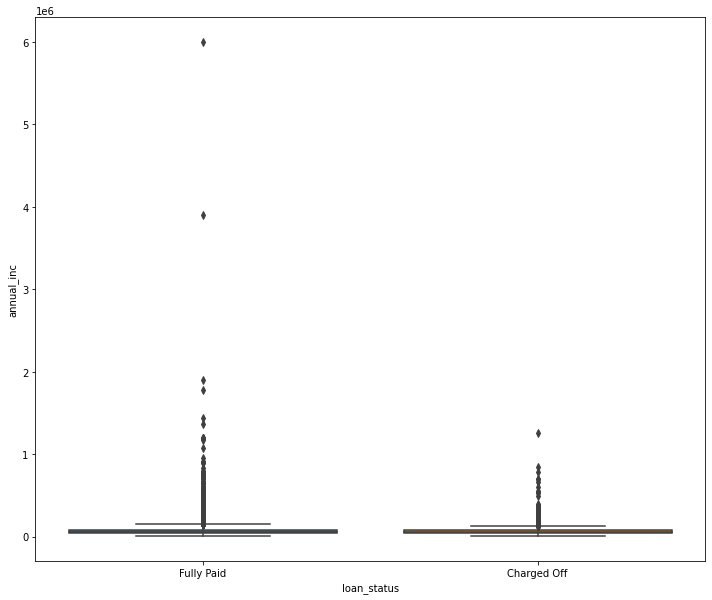

In [78]:
sns.boxplot(data=df, x='loan_status', y='annual_inc')
plt.show()

There are too many outliers in the data as customers might have exagerated their annual income to a greater extent. Let's check how many such rows are present and drop them.

In [79]:
annual_inc_outlier_rows = df[df['annual_inc'] >= 200000].shape[0]
print ('Number of rows to drop : ', annual_inc_outlier_rows)
perc_rows = annual_inc_outlier_rows/df.shape[0] * 100
print ('Percentage of outlier data = ' ,round(perc_rows,2))

Number of rows to drop :  667
Percentage of outlier data =  1.77


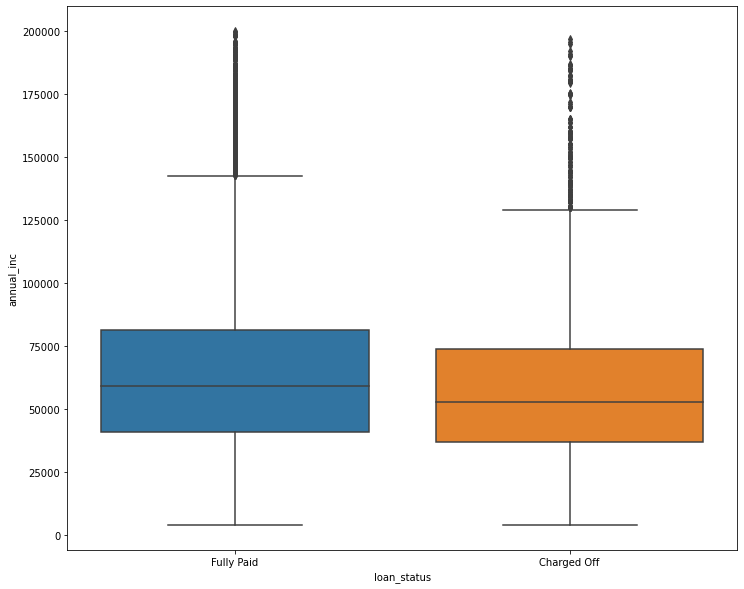

In [80]:
df = df[df['annual_inc'] < 200000]
sns.boxplot(data=df, x='loan_status', y='annual_inc')
plt.show()

**2. loan_amnt**

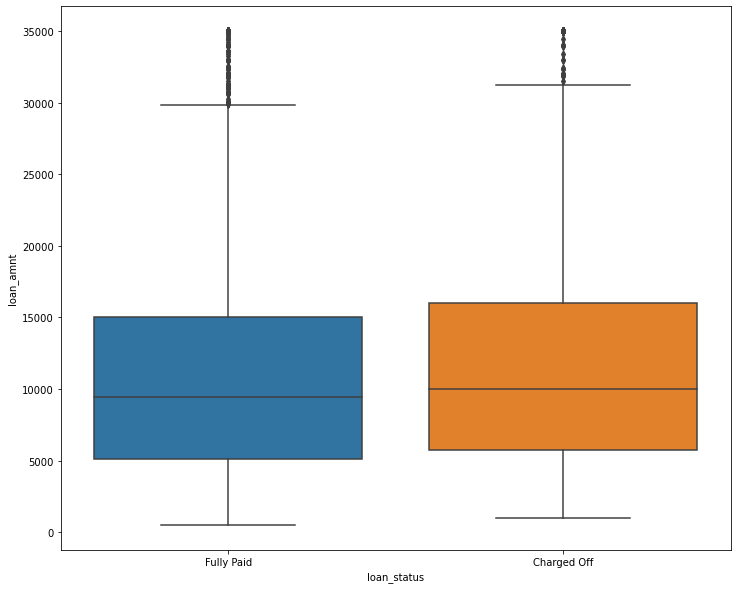

In [81]:
sns.boxplot(data=df, x='loan_status', y='loan_amnt')
plt.show()

## Data transformation

In [82]:
# Interest rate
df['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

In [83]:
# Let's remove the % symbol
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float64')/100
df['int_rate'].head()

0    0.1065
1    0.1527
2    0.1596
3    0.1349
5    0.0790
Name: int_rate, dtype: float64

**out_prncp** and **out_prncp_inv** columns have all values as 0. We can drop these columns as well

In [84]:
# Calculate sum of all out_prncp row values
print (df['out_prncp'].sum())

# Calculate sum of all out_prncp_inv row values
print (df['out_prncp_inv'].sum())

0.0
0.0


In [85]:
# Drop these 2 columns from our analysis
df.drop(['out_prncp', 'out_prncp_inv'], inplace=True, axis=1)

## Correlating variables

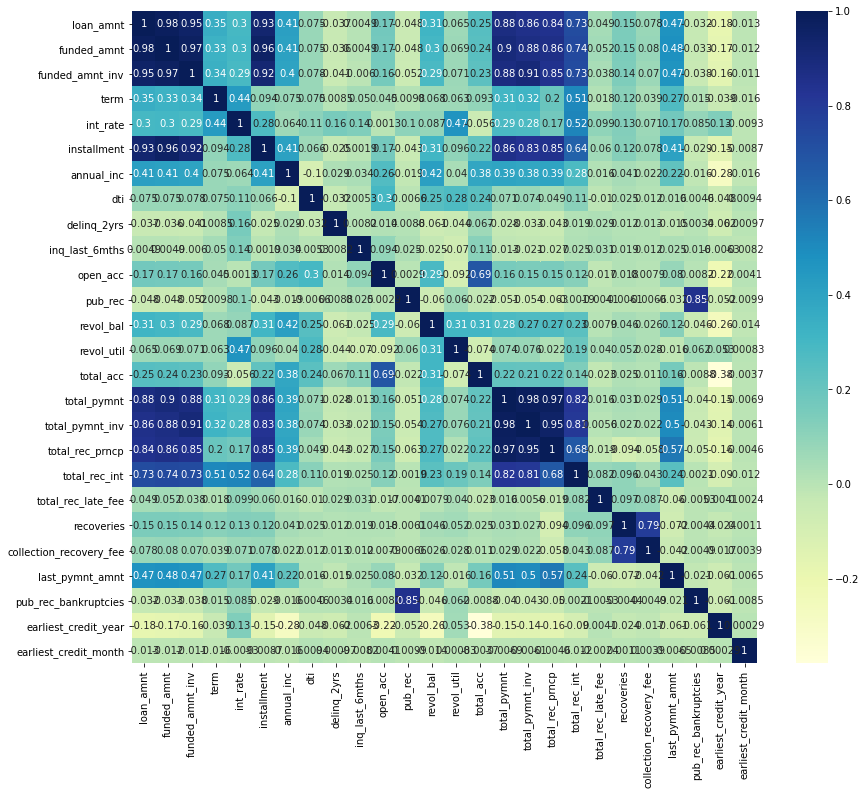

In [86]:
# Setting figure size
plt.figure(figsize=(14,12))

# Assigning correlation matrix from the data frame
corr_mat = df.corr()

# Plotting a heatmap
sns.heatmap(data=df.corr(), cmap='YlGnBu', annot=True)

plt.show()

# Analysing Target variables
To identify the driving factors that leads to financial loss to the lending company, we will have to figure out the target variables that is causing the loan applicants to default on their loans. We will analyse different combinations of the variables to find any patterns in the data.

To analyse the statistics and find any patterns, we will categorise the target variable based on the following two factors:
- Customers personal details like occupation, employment, etc.
- Loan details like loan amount, debt to income ratio, etc

On the basis of these factors, let us categorise each columns in the data frame and analyse them separately. We will be using the columns **loan_status**, **grade**, **sub_grade** to analyse the type of data in each of these attributes and correlate them

## Customer's Personal details columns (Customer attributes)
1. annual_income
2. home_ownership
3. grade
4. sub_grade
5. addr_state
6. dti
7. inq_last_6mths

## Loan and credit details columns (Loan attributes)
1. dti
2. installment
3. int_rate
4. loan_amnt
5. pub_rec
6. pub_rec_bankruptcies
7. revol_bal
8. revol_util

## Loan applicants in each loan status
We will try to find out the number of loan applications who are fully paid, charged off or current and see the percentage of loan applicants in each category.

In [87]:
# Getting the count of loan applicants in each loan statuses

df_loan_status_counts = df['loan_status'].value_counts()
print (df_loan_status_counts)

Fully Paid     31738
Charged Off     5357
Name: loan_status, dtype: int64


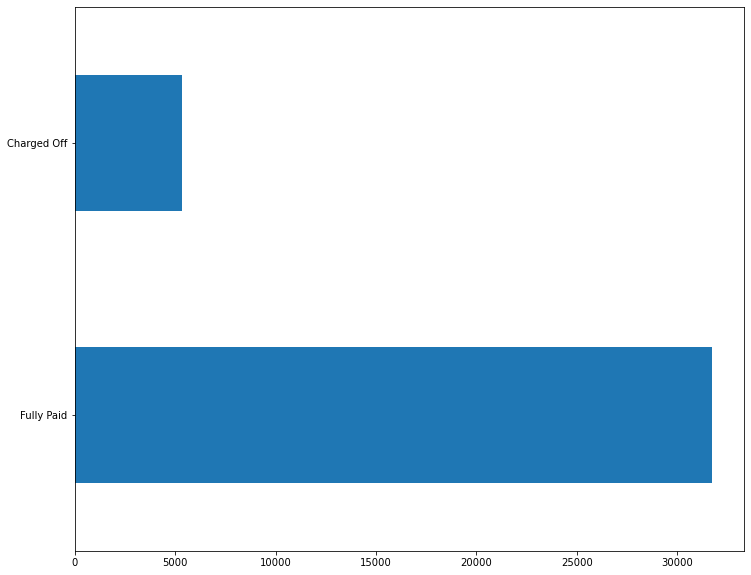

In [88]:
# Visualising a bar plot for the above counts

df_loan_status_counts.plot.barh()
plt.show()

## loan_status against grades
We will check the count of loan applicants against each LC grade in different loan statuses

In [89]:
df_by_grades = pd.pivot_table(data=df, columns=df['loan_status'], index=df['grade'], values='grade', fill_value=0, aggfunc='count')
df_by_grades

loan_status  Charged Off  Fully Paid
grade                               
A                    588        9194
B                   1365        9894
C                   1275        6204
D                   1057        3789
E                    678        1854
F                    301         617
G                     93         186

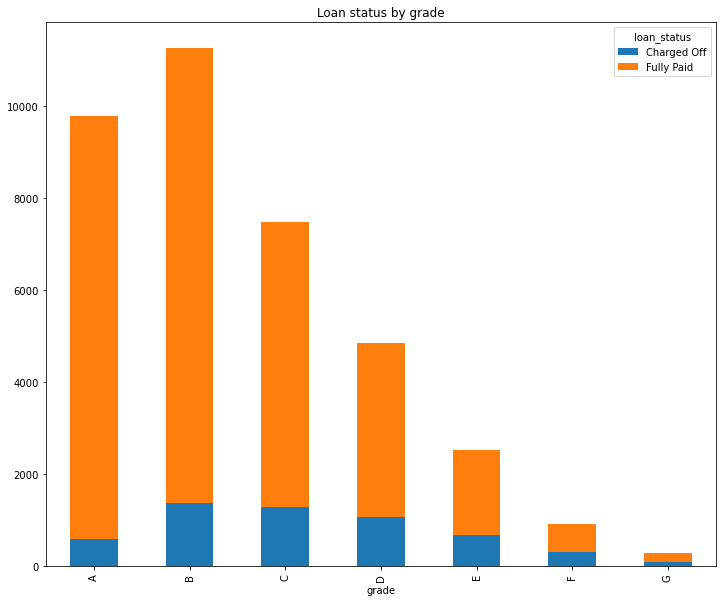

In [90]:
df_by_grades.plot(kind='bar', stacked=True, title='Loan status by grade')
plt.show()

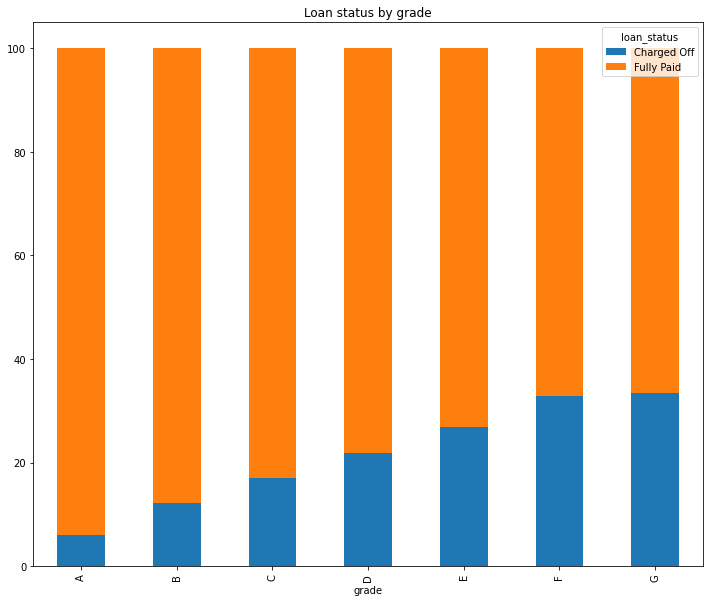

In [91]:
df_by_grades_absolute = df_by_grades[['Charged Off', 'Fully Paid']].apply(lambda x: 100 * x/x.sum(), axis=1)
df_by_grades_absolute.plot(kind='bar', stacked=True, title='Loan status by grade')
plt.show()

From the above plots, we can infer that charged off loan applicants are more towards the lower grades(towards G) and less towards the higher grades(towards A).

## loan_status against sub_grades

Let's analyse the number of loan applicants in each sub_grades assigned by LC

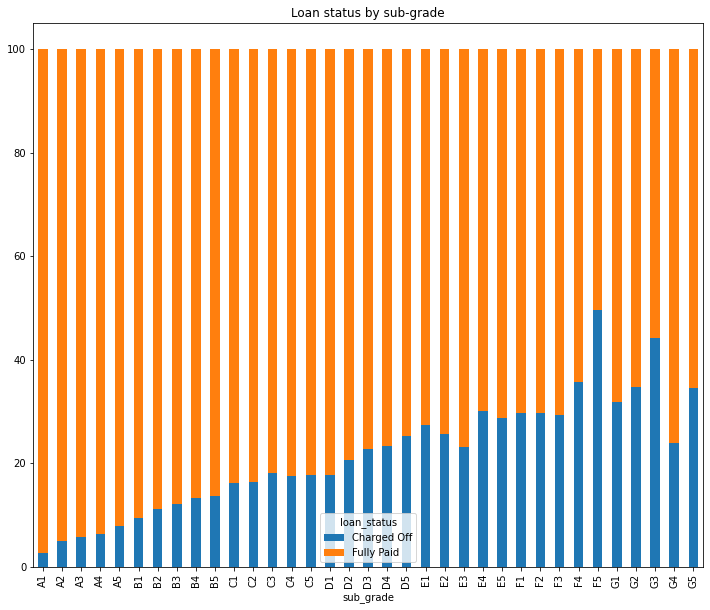

In [92]:
# Create a pivot table to obtain count of loan applications against each subgrade
df_by_sub_grade = pd.pivot_table(data=df, columns=df['loan_status'], index=df['sub_grade'], values='sub_grade', fill_value=0, aggfunc='count')

# Obtain the proportionate value counts in each subgrades for comparative analysis
df_by_sub_grade_absolute = df_by_sub_grade[['Charged Off', 'Fully Paid']].apply(lambda x: 100 * x/x.sum(), axis=1)

# Plot a stacked bar chart to analyse the trend
df_by_sub_grade_absolute.plot(kind='bar', stacked=True, title='Loan status by sub-grade')

plt.show()


We can see an increasing trend of number of loan applicants towards the lower subgrades. Reason being that the applicants assigned with lower subgrades have a poor credit history and that's why they usually default on their loans.

## int_rate and grade

Borrowers who are assigned LC grade 'A' will incur low interest rates on the loans while those assigned with 'G' will incur higher interest rates due to their poor credit history. Let's visualse it.

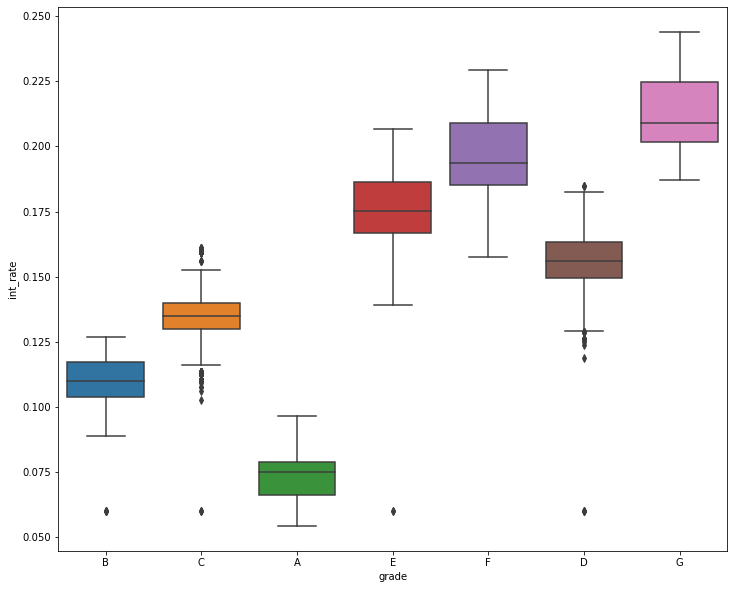

In [93]:
sns.boxplot(data=df, x='grade', y='int_rate')
plt.show()

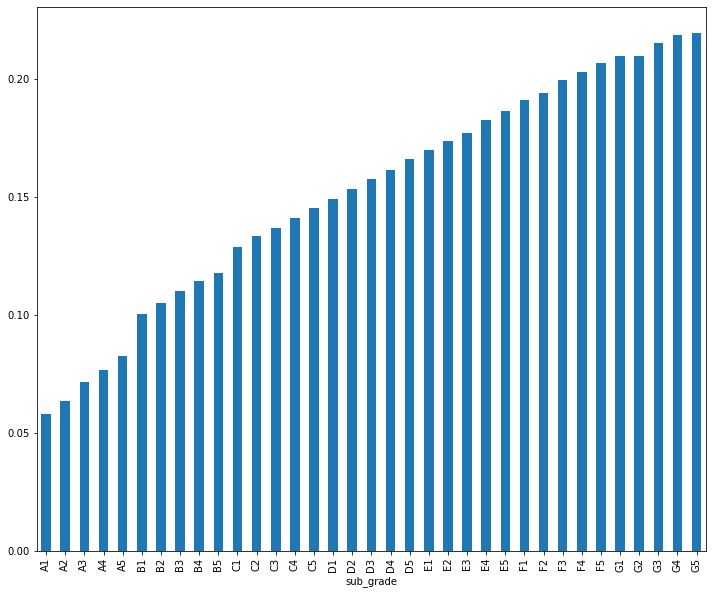

In [94]:
df_int_rate_sub_grade = df.groupby(['sub_grade'])['int_rate'].mean()
df_int_rate_sub_grade.plot.bar()
plt.show()

We can clearly see that lower subgrades(G) have high interest rates than higher subgrades (A)

## loan_amnt and installment

We can see from the heatmap above that loan_amnt and installment have very good correlation. This indicates that people applying for loan generally tend to pay high installments for higher loan amounts which is a fact.

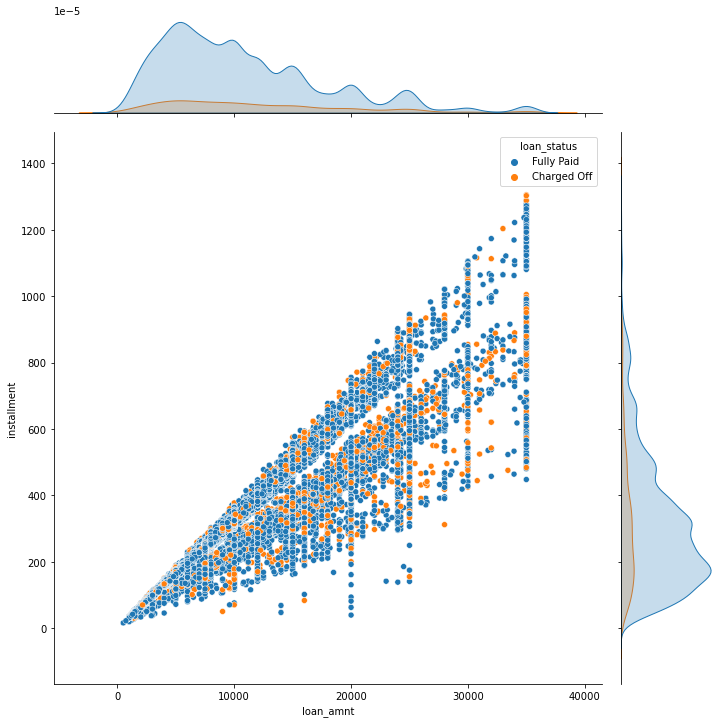

In [95]:
sns.jointplot(data=df, x='loan_amnt', y='installment', hue='loan_status', height=10)
plt.show()

Analysis of statistical variables for installment and loan_amnt against loan_status

**installment** and **loan_status**

In [96]:
df.groupby('loan_status')['loan_amnt'].describe()

count          mean          std     min     25%      50%  \
loan_status                                                                
Charged Off   5357.0  12053.598096  8025.109043  1000.0  5725.0  10000.0   
Fully Paid   31738.0  10744.630254  7077.458466   500.0  5100.0   9425.0   

                 75%      max  
loan_status                    
Charged Off  16000.0  35000.0  
Fully Paid   15000.0  35000.0

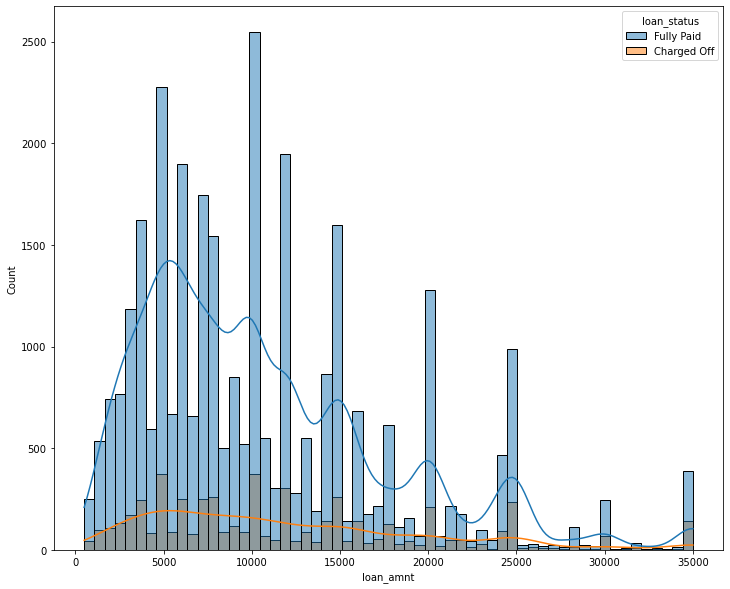

In [97]:
# Visualize the count of loan amounts in each bucket

sns.histplot(data=df, x='loan_amnt', hue='loan_status', kde=True)
plt.show()

In [98]:
df.groupby('loan_status')['installment'].describe()

count        mean         std    min     25%      50%     75%  \
loan_status                                                                    
Charged Off   5357.0  332.940844  213.068661  22.79  169.01  291.760  450.32   
Fully Paid   31738.0  315.983791  202.651700  16.08  164.56  272.935  413.58   

                 max  
loan_status           
Charged Off  1305.19  
Fully Paid   1288.10

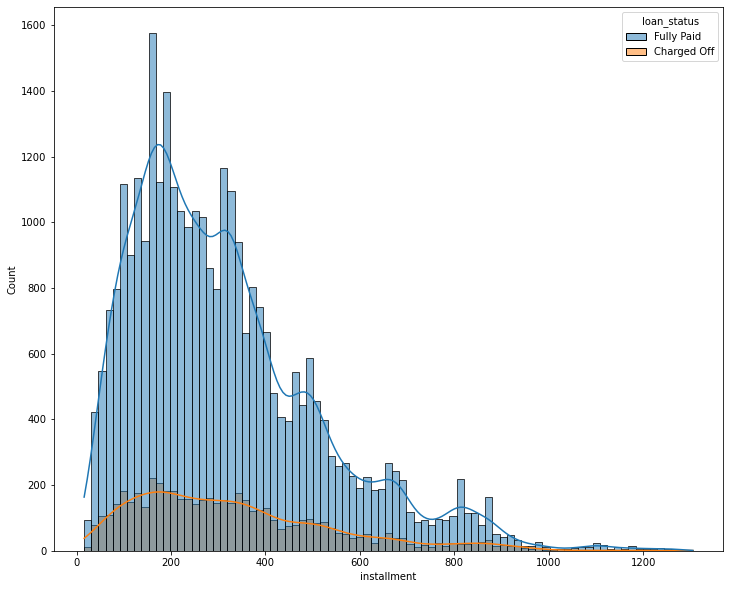

In [99]:
# Visualize the count of installments in each bucket

sns.histplot(data=df, x='installment', hue='loan_status', kde=True)
plt.show()

**term** and **loan_status**

Let's try to find out in which loan tenure the borrowers get defaulted on their loan most often.

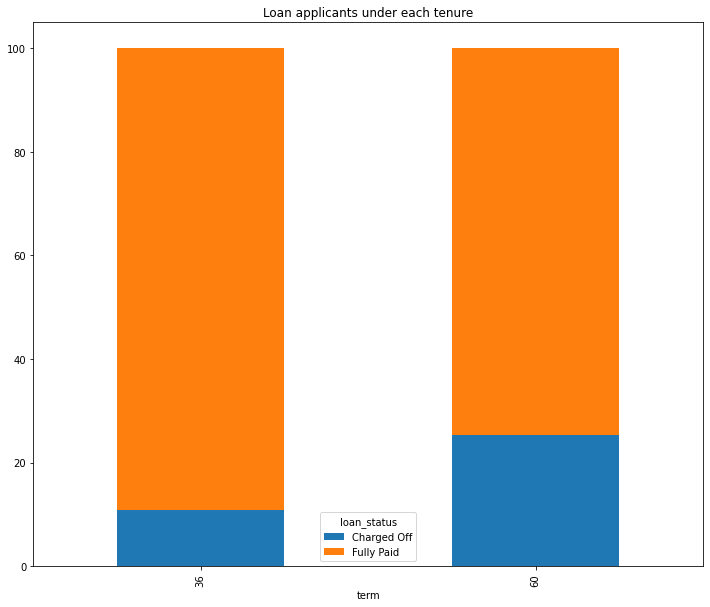

In [100]:
# Count of loan applicants under each loan statuses for both 3 and years of loan tenure
df_term_loan_status = pd.pivot_table(data=df, 
                                     index=df['term'], 
                                     columns=df['loan_status'], 
                                     values='term', 
                                     aggfunc='count')

# Obtaining the proportion of the above count values
df_term_loan_status_absolute = df_term_loan_status.apply(lambda x: x/x.sum() * 100, axis=1)

# Visualizing the same using bar plot
df_term_loan_status_absolute.plot(kind='bar', stacked=True, title='Loan applicants under each tenure')

plt.show()

Borrowers default on their loans with tenure as 5 years more often than in 3 years tenure.

**annual_inc** and **int_rate**

Bivariate analysis of annual_inc and int_rate

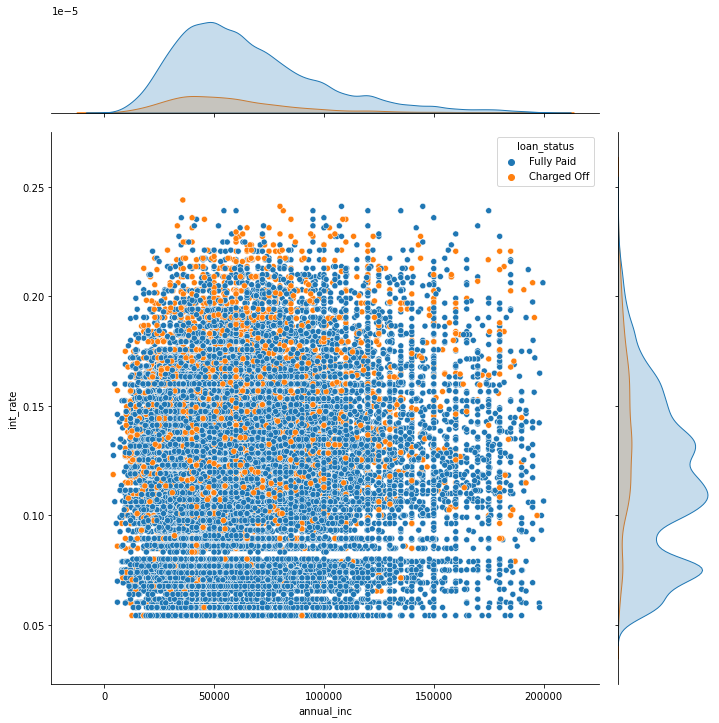

In [101]:
sns.jointplot(data=df, x='annual_inc', y='int_rate', hue='loan_status', height=10)
plt.show()

**Observations:**
1. Data density is more towards low income applicants
2. People with low annual income and high interest rates seems to default on their loans more often. These are the borrowers who are assigned lower grades (towards G)
3. People with low interest rates usually pay of their loans. They are assigned higher grades (towards A)

**annual_inc** and **dti**

From the correlation matrix, we see a negative correlation between borrower's annual_inc and their dti though less. The dti is high for customers with low annual income. We can see that from the scatter plot below. 

In [151]:
# Plotly lib to visualise the density of dti of borrowers against their annual_inc
fig = px.scatter(df, 
                 x='annual_inc', 
                 y='dti', 
                 color='dti', 
                 trendline="ols")

fig.show()

Next, we will see the distribution of borrower's who defaulted on their loans and compare their dti against annual_inc

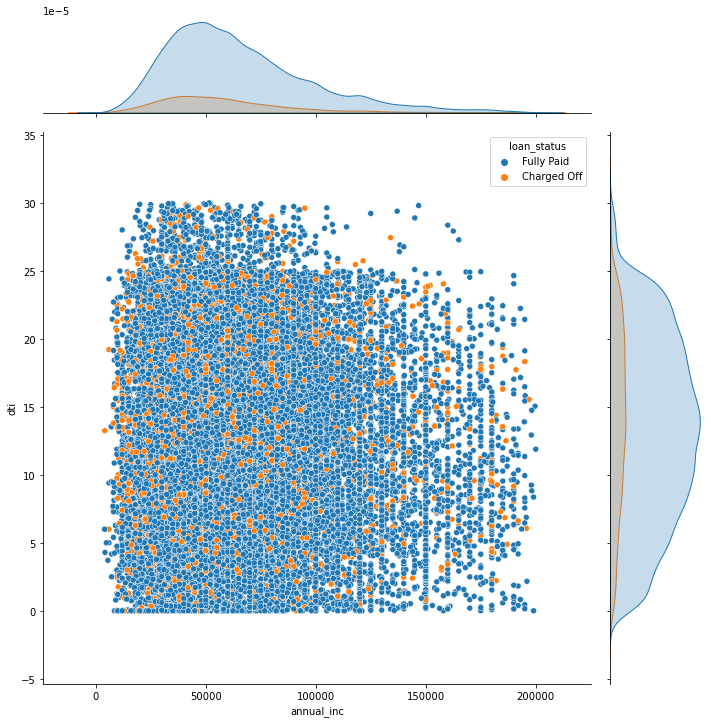

In [150]:
# Visualise the bivariate analysis of dti and annual_inc for each loan_statuses
sns.jointplot(data=df, 
              x='annual_inc', 
              y='dti', 
              hue='loan_status', 
              height=10)

plt.show()

### home_ownership

**Univariate analysis**

In [102]:
# Counting applicants from different categories of home ownership

df['home_ownership'].value_counts()

RENT        17877
MORTGAGE    16266
OWN          2858
OTHER          94
Name: home_ownership, dtype: int64

**Bivariate analysis**

**home_ownership** and **loan_status**

In [103]:
# Obtaining the counts of loan applicants in each loan statuses under different home ownership categories
df_ho_loan_status = pd.pivot_table(data=df, index=df['home_ownership'], columns=df['loan_status'], values='home_ownership', aggfunc='count')

df_ho_loan_status


loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE               2225       14041
OTHER                    18          76
OWN                     419        2439
RENT                   2695       15182

In [104]:
# Obtaining the percentage of counts of all the above loan applicants 
df_ho_loan_status_absolute = df_ho_loan_status.apply(lambda x: x/df.shape[0] * 100, axis=1)

df_ho_loan_status_absolute

loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE           5.998113   37.851462
OTHER              0.048524    0.204879
OWN                1.129532    6.575010
RENT               7.265130   40.927349

Borrowers who stay on RENT and MORTGAGE are more likely to default on their loans than the ones who own a house.

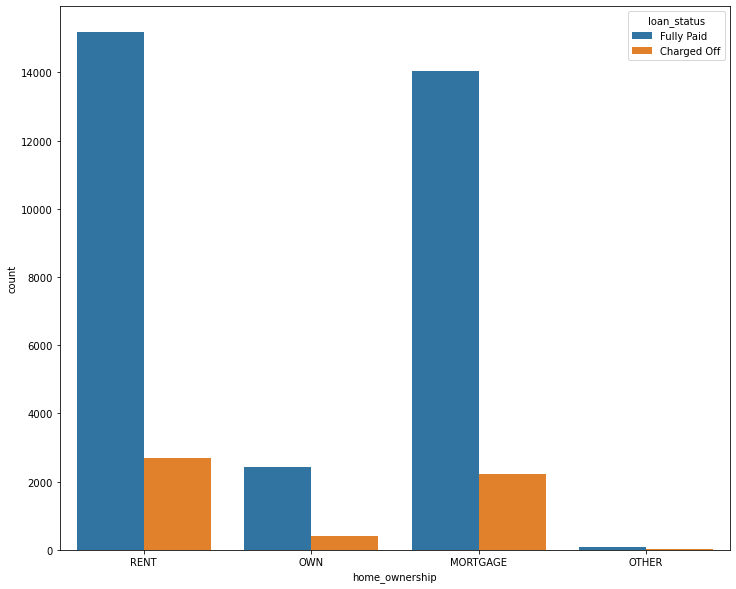

In [105]:
# Visualising the counts against loan_status using countplot

sns.countplot(data=df, x='home_ownership', hue='loan_status')
plt.show()

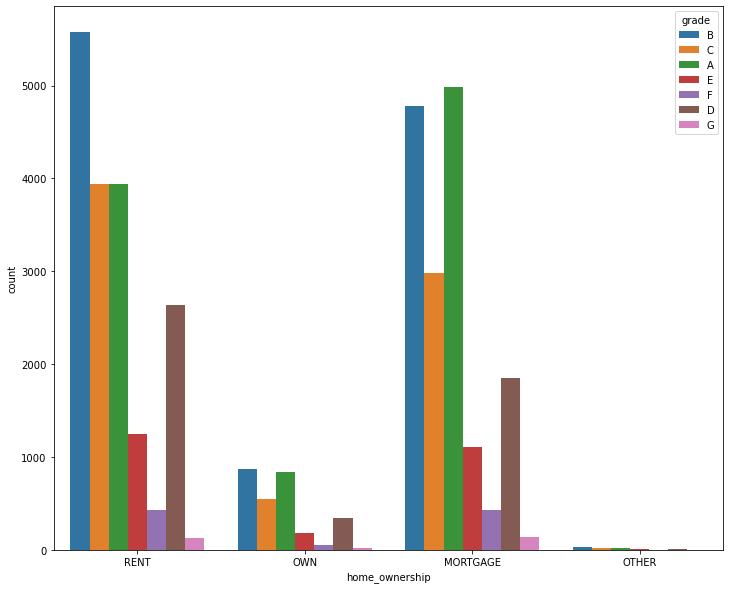

In [106]:
# Visualising the counts against grade using countplot

sns.countplot(data=df, x='home_ownership', hue='grade')
plt.show()

**purpose**

**Univariate analysis**

In [107]:
df['purpose'].value_counts(normalize=True)

debt_consolidation    0.471196
credit_card           0.130638
other                 0.099070
home_improvement      0.072759
major_purchase        0.056126
small_business        0.044292
car                   0.039493
wedding               0.023858
medical               0.017630
moving                0.014989
vacation              0.009920
house                 0.009381
educational           0.008006
renewable_energy      0.002642
Name: purpose, dtype: float64

Maximum loan applications under *debt_consolidation* category

**Bivariate analysis**

**purpose** and **loan_status**

In [108]:
# Obtaining the counts of loan applicants in each loan statuses under different purpose values
df_purpose_loan_status = pd.pivot_table(data=df, index=df['purpose'], columns=df['loan_status'], values='purpose', aggfunc='count')

df_purpose_loan_status

loan_status         Charged Off  Fully Paid
purpose                                    
car                         156        1309
credit_card                 523        4323
debt_consolidation         2661       14818
educational                  48         249
home_improvement            323        2376
house                        55         293
major_purchase              210        1872
medical                     104         550
moving                       87         469
other                       591        3084
renewable_energy             17          81
small_business              444        1199
vacation                     53         315
wedding                      85         800

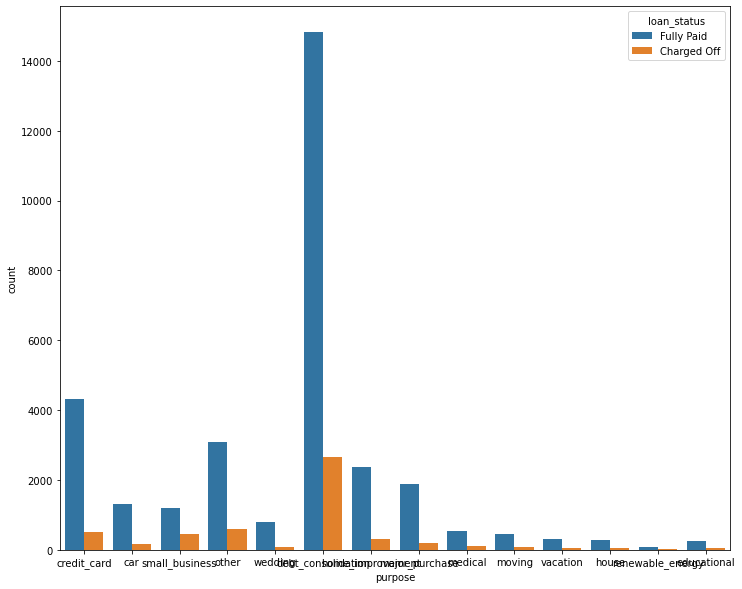

In [109]:
# Visualising the counts against loan_status using countplot

sns.countplot(data=df, x='purpose', hue='loan_status')
plt.show()

### home_ownership and purpose

Let's analyse the loan applications for people who stay on RENT and MORTGAGE and see in which category did they apply the loan and got defaulted.

In [110]:
# Deriving the counts of loan applicants applying for loans under different purposes 
# and analysing it against home_ownership.

df_home_own_purpose = pd.pivot_table(data=df[ df['loan_status'] == 'Charged Off'],
                                     index=df['home_ownership'], 
                                     columns=df['purpose'], 
                                     values='home_ownership', 
                                     fill_value=0, 
                                     aggfunc='count')
df_home_own_purpose


purpose         car  credit_card  debt_consolidation  educational  \
home_ownership                                                      
MORTGAGE         68          221                1112           11   
OTHER             1            2                   7            0   
OWN              14           37                 188            4   
RENT             73          263                1354           33   

purpose         home_improvement  house  major_purchase  medical  moving  \
home_ownership                                                             
MORTGAGE                     248     18              73       42       7   
OTHER                          1      0               0        0       1   
OWN                           39      3              23        9       6   
RENT                          35     34             114       53      73   

purpose         other  renewable_energy  small_business  vacation  wedding  
home_ownership                                                              
MORTGAGE          172                 8             202        13       30  
OTHER               2                 0               4         0        0  
OWN                56                 1              32         4        3  
RENT              361                 8             206        36       52

**Observations:**
1. People staying on RENT and MORTGAGE - Most of them defaulting in *credit_card* payoff, *debt_consolidation* and *small_business*.
1. People staying in MORTGAGE - We can see 248 borrowers defaulting in loan under *home_improvement* category
2. People staying on RENT - 361 borrowers defaulting on loan in *other* category

In [111]:
# Store details of people staying on rent
df_rent = df[ df['home_ownership'] == 'RENT']

# Store details of people staying on mortgage
df_mortgage = df[ df['home_ownership'] == 'MORTGAGE']

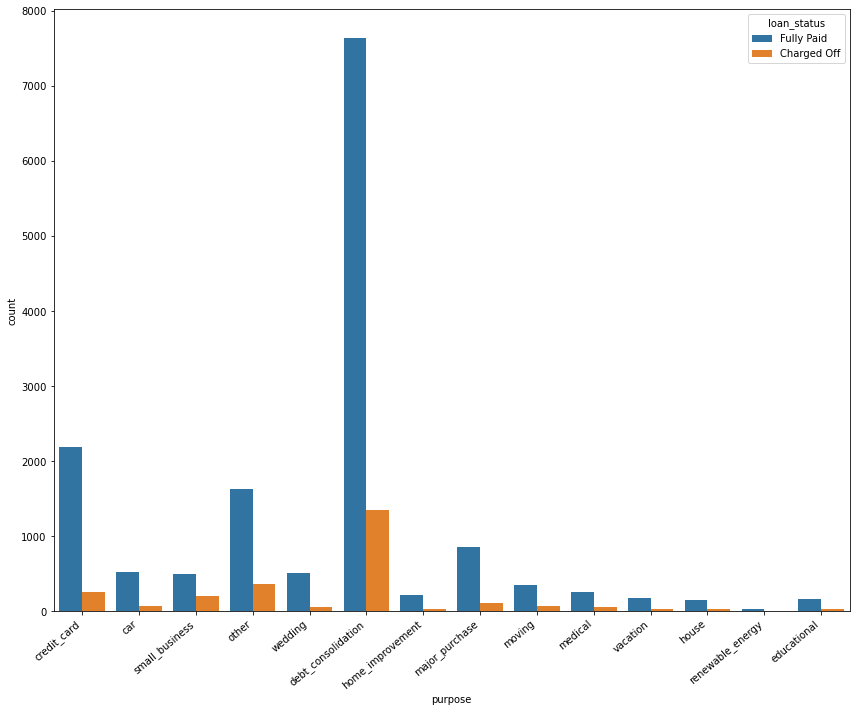

In [112]:
# Couting rented borrowers under different category of purpose
fig = sns.countplot(data=df_rent, x='purpose', hue='loan_status')

# Rotating the x-axis labels for better readability
fig.set_xticklabels(fig.get_xticklabels(), 
                    rotation=40, 
                    ha="right")
plt.tight_layout()

plt.show()

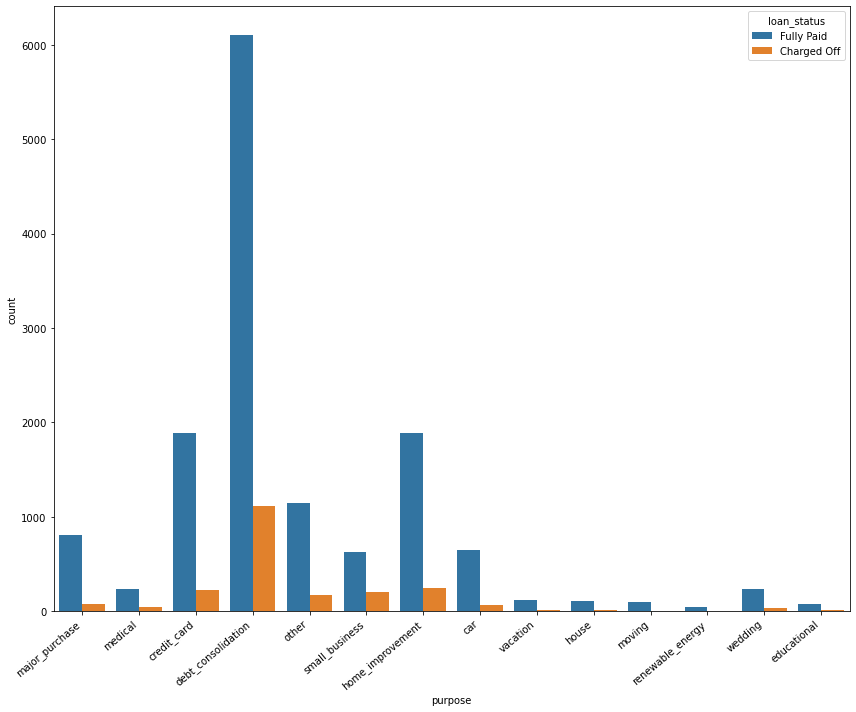

In [113]:
# Couting mortgage borrowers under different category of purpose
fig = sns.countplot(data=df_mortgage, 
                    x='purpose', 
                    hue='loan_status')

# Rotating the x-axis labels for better readability
fig.set_xticklabels(fig.get_xticklabels(), 
                    rotation=40, 
                    ha="right")

plt.tight_layout()
plt.show()

**earliest_credit_year**

In [125]:
df['earliest_credit_year'].value_counts()

2000    3063
1999    2816
1998    2686
2001    2396
1997    2304
1996    2109
1995    1980
1994    1835
2002    1829
2003    1765
2004    1680
2005    1450
1993    1386
2006    1137
1992     975
1990     944
1991     876
1989     791
2007     691
1988     670
1987     551
1986     462
1985     409
1984     366
1983     303
1982     200
1981     169
1980     165
1978     155
2008     149
1979     148
1977     109
1976      86
1975      79
1974      60
1973      58
1970      47
1971      41
1972      41
1969      34
1968      19
1967      17
1966      11
1963       8
1965       7
1962       5
1964       5
1954       2
1961       2
1959       1
1946       1
1950       1
1956       1
Name: earliest_credit_year, dtype: int64

In [130]:
# Finding the assigned grades count for borrower's falling under different earliest credit year
df_credit_year = pd.pivot_table(data=df, 
                                index=df['earliest_credit_year'], 
                                columns=df['grade'], 
                                values='earliest_credit_year', 
                                fill_value=0, 
                                aggfunc='count')

df_credit_year

grade                   A    B    C    D    E    F   G
earliest_credit_year                                  
1946                    0    1    0    0    0    0   0
1950                    0    1    0    0    0    0   0
1954                    1    0    0    1    0    0   0
1956                    0    1    0    0    0    0   0
1959                    1    0    0    0    0    0   0
1961                    0    2    0    0    0    0   0
1962                    1    1    1    1    1    0   0
1963                    4    3    1    0    0    0   0
1964                    3    1    0    1    0    0   0
1965                    3    0    2    2    0    0   0
1966                    4    2    2    1    2    0   0
1967                    5    8    3    1    0    0   0
1968                    9    3    4    1    1    1   0
1969                   13   14    5    1    1    0   0
1970                   21    9    8    6    2    1   0
1971                   15   10    6    7    3    0   0
1972                   16   12    9    2    1    0   1
1973                   13   21   12    5    7    0   0
1974                   35   13    3    5    4    0   0
1975                   31   26    9    4    6    3   0
1976                   37   24   12   10    1    2   0
1977                   36   37   14    8   13    1   0
1978                   60   43   25   19    7    0   1
1979                   55   45   24   18    6    0   0
1980                   62   50   23   17    9    3   1
1981                   67   44   29   14   12    0   3
1982                   68   66   36   14   12    4   0
1983                   87   94   67   32   20    3   0
1984                  127   93   78   39   19    5   5
1985                  128  146   64   43   21    6   1
1986                  177  122   81   42   27   11   2
1987                  183  178   93   51   29   13   4
1988                  219  192  121   78   40   14   6
1989                  255  260  140   72   42   15   7
1990                  291  307  141  122   54   25   4
1991                  307  245  153   92   55   20   4
1992                  315  294  162  116   56   24   8
1993                  418  433  260  151   83   28  13
1994                  538  547  355  203  125   54  13
1995                  525  589  408  254  137   50  17
1996                  596  626  406  247  157   57  20
1997                  651  636  454  311  181   58  13
1998                  715  838  568  301  194   55  15
1999                  734  886  553  387  178   61  17
2000                  762  921  648  394  209  102  27
2001                  601  755  485  328  164   45  18
2002                  430  559  413  246  114   52  15
2003                  422  580  374  250   97   28  14
2004                  353  550  364  236  113   46  18
2005                  219  475  345  234  125   40  12
2006                  140  312  295  242   98   38  12
2007                   28  149  181  190   94   42   7
2008                    1   35   42   47   12   11   1

**Observation**: This data can be used to predict the **grades** and **sub_grades** based on the earliest credit year of the borrower and whther that borrower has defaulted on the loan or not

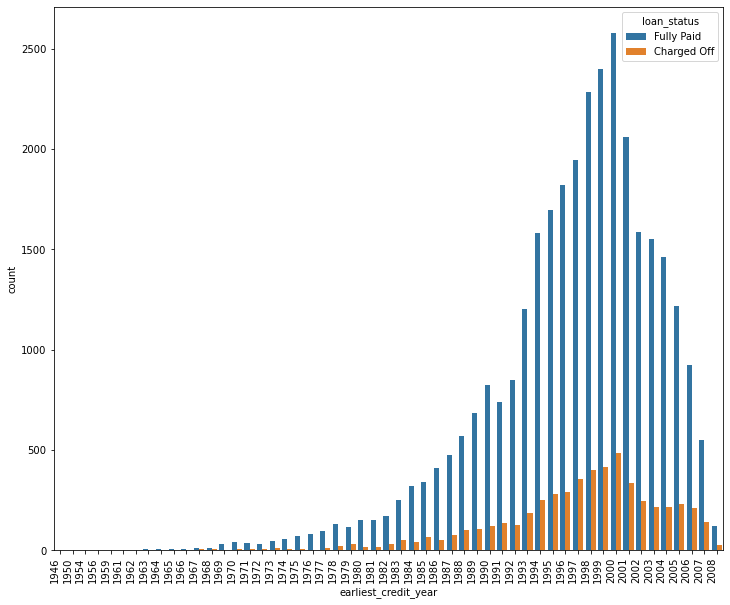

In [134]:
# Couting number of loan applicants based on earliest credit years with categorical variable as loan_status
fig=sns.countplot(data=df, 
                  x='earliest_credit_year',
                  hue='loan_status')

# Rotating the x-axis labels for better readability
fig.set_xticklabels(fig.get_xticklabels(), 
                    rotation=90, 
                    ha="right")

plt.show()

**Observations:**
We can see less number of borrowers towards the beginning and the end of the earliest credit years. Reason being those borrowers with credit years starting 1946 will be a senior citizen by now and they will have been fully settled in their homes. For those borrowers whose earliest credit history is in 21st century, they are just starting to settle down. They might be the youngsters, teenagers or adults who just started with their credit balance.

Borrowers with earliest credit year in the range 1994 - 2002 has more number of loan applications and they are the ones who defaulted on their loans.

Let's take a chunk of data with earliest credit history containing maximum borrowers. We will analyse the data for years between **1995** and **2002**

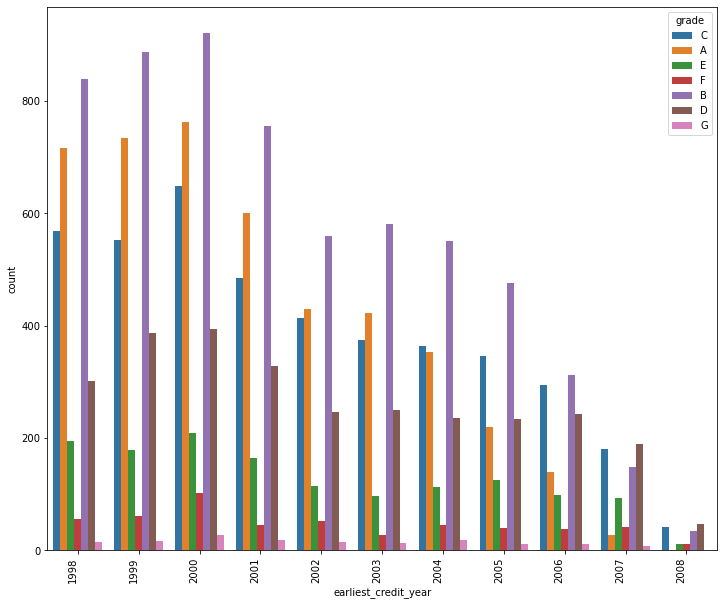

In [136]:
df_1995_2002 = df[ df['earliest_credit_year'].between(1998,2009) ]

fig=sns.countplot(data=df_1995_2002, 
                  x='earliest_credit_year',
                  hue='grade')

# Rotating the x-axis labels for better readability
fig.set_xticklabels(fig.get_xticklabels(), 
                    rotation=90, 
                    ha="right")

plt.show()

**Observation:** Taking a chunk of data where we see huge number of borrowers with the earliest credit years between 1998 and 2008, we can see that most of them are assigned grades **B**.  

Next, we will find the percentage of borrowers who were assigned the top 3 grades above (B, A, C) and defaulted on their loans

In [140]:
df_cr_yr_grades = df_1995_2002[ df_1995_2002['grade'].isin(['A', 'B', 'C'])]
df_cr_yr_grades_counts = pd.pivot_table(data=df_cr_yr_grades, 
                                        index=df['grade'], 
                                        columns=df['loan_status'], 
                                        values='grade', 
                                        aggfunc='count')
df_cr_yr_grades_counts_perc = df_cr_yr_grades_counts.apply(lambda x: x/x.sum() * 100, axis=1)
df_cr_yr_grades_counts_perc

loan_status  Charged Off  Fully Paid
grade                               
A               6.311010   93.688990
B              11.765677   88.234323
C              16.401125   83.598875

**Observation:** Percentage of charged off borrowers is more for those assigned grade **C**. Business can make smart decisions using these results